In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import reverse_geocoder
import glob
import os
import geopandas
from geodatasets import get_path

In [2]:
files = glob.glob("../data/flickr_data/*.csv")

In [3]:
files

['../data/flickr_data/mexico.csv',
 '../data/flickr_data/belize.csv',
 '../data/flickr_data/costa_rica.csv',
 '../data/flickr_data/nicaragua.csv',
 '../data/flickr_data/guatemala.csv',
 '../data/flickr_data/el_salvador.csv']

In [4]:
country_mapping = {
    "guatemala": "GTM", 
    "mexico": "MEX", 
    "belize": "BLZ", 
    "honduras": "HND",
    "nicaragua": "NIC",
    "costa_rica": "CRI",
    "panama": "PAN",
    "el_salvador": "SLV"
}

In [5]:
filename = files[2]

country_name = filename.split("/")[-1].split(".")[0]

country_file = os.path.join("../data/map_data/", os.path.join(country_name, "gadm41_" + country_mapping[country_name] + "_1.shp"))

df = pd.read_csv(filename)

In [6]:
print(country_name)

costa_rica


In [7]:
df

,Unnamed: 0,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,latitude,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family
0,0,54261198538,56339362@N03,f743e35c3a,65535,66,Buenos Aires,1,0,0,9.164480,-83.334673,16,0,NaN,3624593,1,0,0,0
1,1,54260081477,56339362@N03,152dc157bc,65535,66,Reserva El Tigre,1,0,0,9.173211,-83.419801,16,0,NaN,3624470,1,0,0,0
2,2,54260081427,56339362@N03,bc732666b1,65535,66,Reserva El Tigre,1,0,0,9.173186,-83.419762,16,0,NaN,3624470,1,0,0,0
3,3,54261395715,56339362@N03,2a7a9120c1,65535,66,Reserva El Tigre,1,0,0,9.172002,-83.419067,16,0,NaN,3624470,1,0,0,0
4,4,54261206654,56339362@N03,48d8164974,65535,66,Reserva El Tigre,1,0,0,9.173377,-83.419748,16,0,NaN,3624470,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,245,54259588690,56339362@N03,81bf870720,65535,66,Reserva El Tigre,1,0,0,9.170497,-83.421159,16,0,NaN,3624470,1,0,0,0
24996,246,54259588670,56339362@N03,8015cae613,65535,66,Reserva El Tigre,1,0,0,9.170563,-83.421334,16,0,NaN,3624470,1,0,0,0
24997,247,54259405109,56339362@N03,e1eeb8e2a1,65535,66,Reserva El Tigre,1,0,0,9.170111,-83.421053,16,0,NaN,3624470,1,0,0,0
24998,248,54259164876,56339362@N03,40f8764e5d,65535,66,Reserva El Tigre,1,0,0,9.170297,-83.421089,16,0,NaN,3624470,1,0,0,0


In [8]:
df = df.drop_duplicates()

In [9]:
len(df)

17804

In [10]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

In [11]:
# world = geopandas.read_file(get_path("naturalearth.land"))

# # We restrict to South America.
# ax = world.clip([-100, 0, -50, 25]).plot(color="white", edgecolor="black")

# # We can now plot our ``GeoDataFrame``.
# gdf.plot(ax=ax, color="red")

# plt.show()

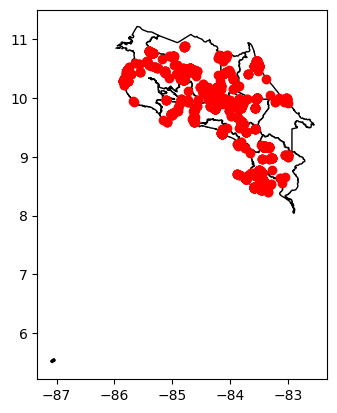

In [12]:
# country = geopandas.read_file("../data/map_data/guatemala/gadm41_GTM_1.shp")
# country = geopandas.read_feather("../data/map_data/nicaragua/gadm41_NIC_")
country = geopandas.read_file(country_file)

ax = country.plot(color="white", edgecolor="black")

gdf.plot(ax=ax, color="red")

plt.show()

## Inspect gathered data

In [13]:
import geopy
from geopy.geocoders import Nominatim

In [14]:
def get_coords(x):
    
    geolocator = Nominatim(user_agent='test')
    location = geolocator.geocode(x)
    try:
        lat = location.latitude
        long = location.longitude
    except AttributeError:
        lat = 0
        long = 0

    return lat, long

In [15]:
df_cities = pd.read_csv("../data/backpacking_cities.csv")

In [16]:
df_cities

,Country,City,Activities,Must try local food and drinks,Reliable high speed internet,Nearby Airport,Uber
0,Mexico,Mexico City,"museums, ruins, art, nightlife",Tacos,Yes,Yes,Yes
1,Mexico,Puebla,"museums, art",NaN,Yes,Yes,Yes
2,Mexico,San Miguel de Allende,architecture,NaN,Yes,Yes,Yes
3,Mexico,Oaxaca,"ruins, rich culture","mole, mezcal, chapulines",Yes,Yes,No
4,Mexico,San Jose del Pacifico,"nature, spirituality, beach",NaN,No,No,No
5,Mexico,Puerto Escondido,"surfing, yoga, nightlife, beach",NaN,No,Yes,No
6,Mexico,Mazunte,"surfing, yoga, spirituality, beach",NaN,No,No,No
7,Mexico,Zipolite,"yoga, spirituality, alt lifestyle, beach",NaN,No,No,No
8,Mexico,San Cristobal de las casas,rich culture,"pozol, pox, tascalate",Yes,Yes,No
9,Mexico,Merida,"museums, art, cenote",NaN,Yes,Yes,Yes


In [17]:
df_cities["query_term"] = df_cities["City"] + ", " + df_cities["Country"]

In [18]:
df_cities["coord"] = df_cities["query_term"].apply(lambda x: get_coords(x))

In [19]:
# df_cities[df_cities["City"] == "Semuc Chapey"]["coord"].values = (15.53610, -89.94706)

In [20]:
df_cities["latitude"], df_cities["longitude"] = zip(*df_cities["coord"])

In [38]:
def plot_coords(df, country_name, country_mapping):

    # df_country = df[df["Country"] == country_name]
    df_country = df
    country_name = country_name.lower().replace(" ", "_") 
    # country_file = os.path.join("../data/map_data/", os.path.join(country_name, "gadm41_" + country_mapping[country_name] + "_1.shp"))
    country_file = "../data/central_america/central_america.shp"

    country = geopandas.read_file(country_file)

    gdf = geopandas.GeoDataFrame(
    df_country, geometry=geopandas.points_from_xy(df_country.longitude, df_country.latitude), crs="EPSG:4326")

    ax = country.plot(color="white", edgecolor="black")

    gdf.plot(ax=ax, color="red")

    plt.show()

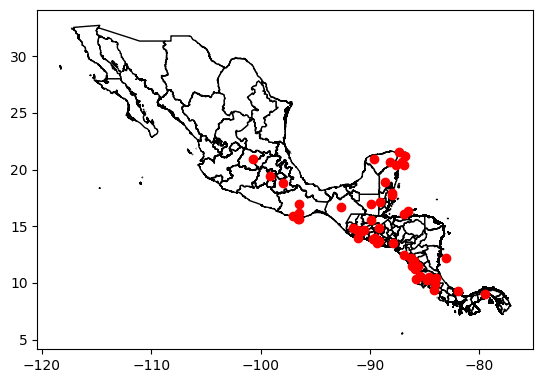

In [39]:
plot_coords(df_cities, "Mexico", country_mapping)

In [41]:
df_cities.to_csv("../data/backpacking_cities_processed.csv")